# Predicting Pipe Failure Conditions with Decision Trees and Random Forests

In [ ]:
#dependancies list
'''
- pymssql
- pandas
- json


'''

## Importing Data from SQL

In [16]:
import pandas as pd
import json
import pypyodbc

conn = pypyodbc.connect("DRIVER={SQL Server};\
                        SERVER=yvwchallenge.chqn5g6ohkqb.ap-southeast-2.rds.amazonaws.com;\
                        UID=admin;\
                        PWD=passwordpassword;\
                        DATABASE=yvwchallenge")
#data["title"] = data.boilerplate.map(lambda x: json.loads(x).get("title", ""))
#data["body"] = data.boilerplate.map(lambda x: json.loads(x).get("body", ""))
#data = pd.read_sql(data_sql)

yvw_df = pd.read_sql('SELECT * FROM yvwdataframe', conn)
yvw_df.head()

,asset id,event time,event date,class structure,class structure id,material,nominal size (mm),soil class,soil description,grant description,...,failure code,failure description,job plan,job plan number,service location id,formatted address,city,post code,latitude,longitude
0,2957806,7:30:00 PM,12/7/2009,Repair Burst Water Main,WRBRST,CAST IRON CEMENT LINED,100,SE,Low shrink/swell potential.,Silty Soil.,...,UNKN,UNKN,None,None,1142131,18 BECKETT STREET CHADSTONE 3148,CHADSTONE,3148,-37.88250410,145.09803510
1,2957969,10:49:00 PM,11/7/2003,Repair Burst Water Main,WRBRST,ASBESTOS CEMENT(INCL HARDYFLEX),150,EX,Moderate shrink/swell potential.,Clay.,...,UNKN,UNKN,None,None,1690815,23 WARRINA STREET CHADSTONE 3148,CHADSTONE,3148,-37.87416700,145.10533000
2,2957969,6:30:00 PM,6/18/2004,Repair Burst Water Main,WRBRST,ASBESTOS CEMENT(INCL HARDYFLEX),150,EX,Moderate shrink/swell potential.,Clay.,...,UNKN,UNKN,None,None,1276195,10 WARRINA STREET CHADSTONE 3148,CHADSTONE,3148,-37.87452744,145.10466380
3,2957975,1:41:00 PM,3/5/2001,Repair Burst Water Main,WRBRST,CAST IRON CEMENT LINED,100,SE,Low shrink/swell potential.,Silty Soil.,...,UNKN,UNKN,None,None,1279922,18 TUHANS ROAD MOUNT WAVERLEY 3149,MOUNT WAVERLEY,3149,-37.88474047,145.11267990
4,2957978,3:54:00 PM,2/3/2014,Repair Burst Water Main,WRBRST,COPPER,40,SE,Low shrink/swell potential.,Silty Soil.,...,UNKN,UNKN,None,None,1275823,None,None,None,None,None


In [33]:
yvw_df[["failure description"]].count()

failure description    82993
dtype: int64

In [34]:
yvw_df.to_pickle("yvw_df.pkl")

In [35]:
yvw_df = pd.read_pickle("yvw_df.pkl")

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb


print(yvw_df.groupby(["description"])[["asset id"]].count())
print(yvw_df.groupby(["nominal size (mm)"])[["asset id"]].count())
print(yvw_df["failure description"].count())

'''
sb.factorplot(x = "failure description",
              y = "class structure",
              kind = "bar",
              data = data)
plt.show()'''

                                                    asset id
description                                                 
Fault,Water (Drinking  And Ndw) Works,Service,N...         1
Fault,Water (Drinking And Ndw) Works,Hydrant-fi...         1
Fault,Water (Drinking And Ndw) Works,Hydrant-fi...         1
Fault,Water (Drinking And Ndw) Works,Hydrant-fi...         1
Fault,Water (Drinking And Ndw) Works,Hydrant-fi...         2
Fault,Water (Drinking And Ndw) Works,Hydrant-fi...         3
Fault,Water (Drinking And Ndw) Works,Hydrant-fi...         2
Fault,Water (Drinking And Ndw) Works,Hydrant-fi...         2
Fault,Water (Drinking And Ndw) Works,Hydrant-fi...         1
Fault,Water (Drinking And Ndw) Works,Hydrant-fi...         2
Fault,Water (Drinking And Ndw) Works,Hydrant-fi...         2
Fault,Water (Drinking And Ndw) Works,Hydrant-fi...         1
Fault,Water (Drinking And Ndw) Works,Hydrant-fi...         1
Fault,Water (Drinking And Ndw) Works,Hydrant-fi...         2
Fault,Water (Drinking An

'\nsb.factorplot(x = "failure description",\n              y = "class structure",\n              kind = "bar",\n              data = data)\nplt.show()'

TypeError: unsupported operand type(s) for /: 'str' and 'long'

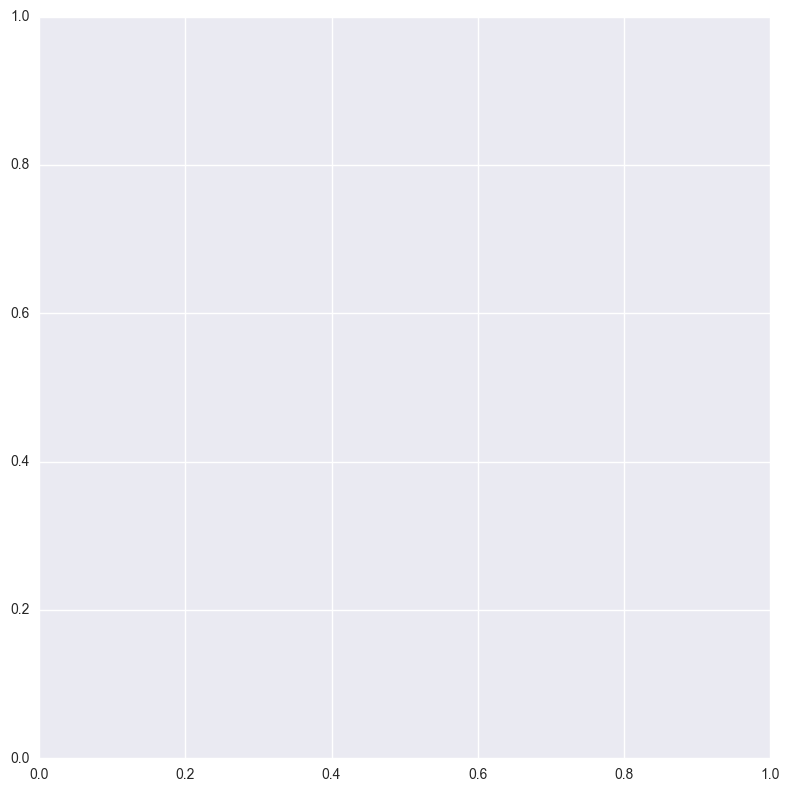

In [42]:

p = sb.factorplot(x = "asset id",
              y = "class structure",
              kind = "bar",
              data = yvw_df,
              size = 8)
p.set_xticklabels(rotation = 45, horizontalalignment = "right")
plt.show()

### Exercise: 5. How many articles are there per category?

                    label
alchemy_category         
?                    2342
arts_entertainment    941
business              880
computer_internet     296
culture_politics      343
gaming                 76
health                506
law_crime              31
recreation           1229
religion               72
science_technology    289
sports                380
unknown                 6
weather                 4


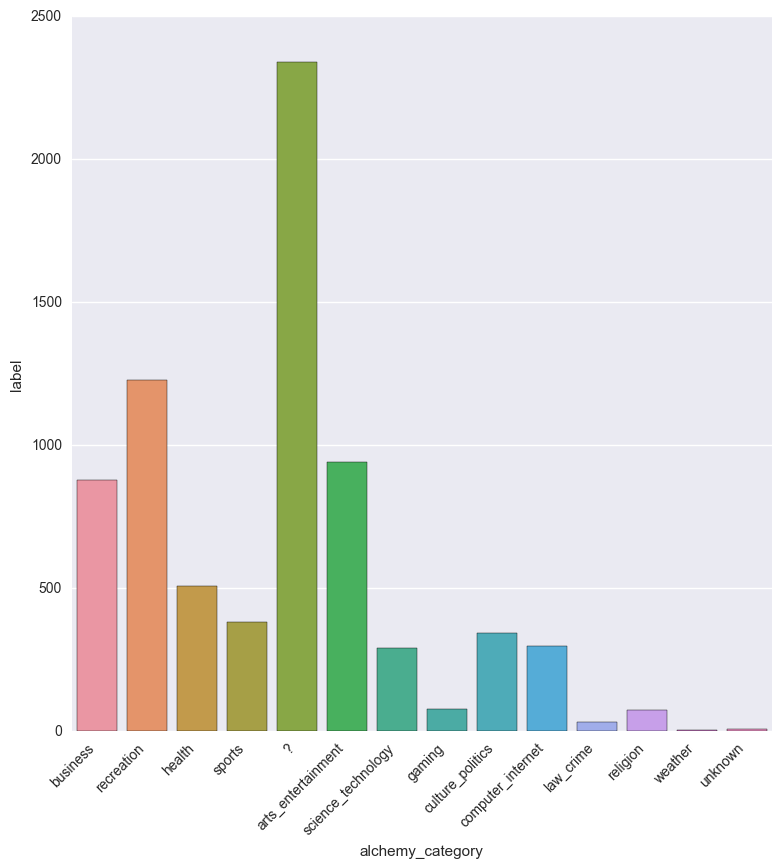

In [5]:
print(data.groupby(["alchemy_category"])[["label"]].count())

## OR

p = sb.factorplot(x = "alchemy_category",
              y = "label",
              kind = "bar",
              data = data,
              size = 8,
              estimator = len)
p.set_xticklabels(rotation = 45, horizontalalignment = "right")
plt.show()

#### Let's try extracting some of the text content
### Exercise: 6. Create a feature for the title containing "recipe"
Is the % of evegreen websites higher or lower on pages that have recipe in the the title?

In [6]:
# Option 1: Create a function to check for this

def has_recipe(text_in):
    try:
        if "recipe" in str(text_in).lower():
            return 1
        else:
            return 0
    except: 
        return 0

data["recipe"] = data["title"].map(has_recipe)

# Option 2: lambda functions
#data["recipe"] = data["title"].map(lambda t: 1 if "recipe" in str(t).lower() else 0)

# Option 3: string functions
data["recipe"] = data["title"].str.contains("recipe")

###  Let's Explore Some Decision Trees

### Demonstration: Build a decision tree model to predict the "evergreeness" of a given website

In [14]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np

X = data[["image_ratio", "html_ratio", "recipe", "label"]].dropna()
y = X["label"]
X.drop("label", axis = 1, inplace = True)   

# Fits the model
model = DecisionTreeClassifier()
model.fit(X, y)

# Helper function to visualise Decision Trees (creates a file tree.png)
from sklearn.tree import export_graphviz
from os import system

def build_tree_image(model):
    dotfile = open("tree.dot", "w")
    export_graphviz(model,
                    out_file = dotfile,
                    feature_names = X.columns)
    dotfile.close()
    system("dot -Tpng tree.dot -o tree.png")
build_tree_image(model)

model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

## Decision Trees in scikit-learn

### Exercise: Evaluate the decision tree using cross-validation; use AUC as the evaluation metric

In [8]:
from sklearn.cross_validation import cross_val_score

# ... #

scores = cross_val_score(model, X, y, scoring = "roc_auc", cv = 20)
print("CV AUC {}, Average AUC {}".format(scores, scores.mean()))

C:\Program Files\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


CV AUC [ 0.53961988  0.50716374  0.55        0.47748538  0.51096491  0.5127193
  0.54809942  0.52134503  0.59064327  0.52119883  0.57061404  0.53253968
  0.56460051  0.546082    0.50286719  0.51844462  0.51330141  0.52344004
  0.55651621  0.53950519], Average AUC 0.532357532954


### Adjusting Decision Trees to Avoid Overfitting

### Demonstration: Control for overfitting in the decision model by adjusting the maximum number of questions (max_depth) or the minimum number of records in each final node (min_samples_leaf)

In [9]:
model = DecisionTreeClassifier(max_depth = 2, min_samples_leaf = 5)
model.fit(X, y)
build_tree_image(model)

### Demonstration: Build a random forest model to predict the evergreeness of a website

In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 20, n_jobs=5)    
model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=5, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

### Demonstration: Extracting importance of features

In [11]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({"Features": features, "Importance Score": feature_importances})
features_df.sort_values("Importance Score", inplace = True, ascending = False)

features_df.head()

,Features,Importance Score
1,html_ratio,0.526940
0,image_ratio,0.443073
2,recipe,0.029987


### Exercise: Evaluate the Random Forest model using cross-validation; increase the number of estimators and view how that improves predictive performance

In [12]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(model, X, y, scoring = "roc_auc")
print("CV AUC {}, Average AUC {}".format(scores, scores.mean()))

for n_trees in range(1, 100, 10):
    model = RandomForestClassifier(n_estimators = n_trees)
    scores = cross_val_score(model, X, y, scoring = "roc_auc")
    print("n trees: {}, CV AUC {}, Average AUC {}".format(n_trees, scores, scores.mean()))

CV AUC [ 0.56395813  0.58363538  0.58026632], Average AUC 0.575953274472
n trees: 1, CV AUC [ 0.52902583  0.52953124  0.54953695], Average AUC 0.536031337811
n trees: 11, CV AUC [ 0.56721976  0.58631118  0.57900921], Average AUC 0.57751338355
n trees: 21, CV AUC [ 0.56732575  0.58297312  0.58560065], Average AUC 0.578633174054
n trees: 31, CV AUC [ 0.56296425  0.58566412  0.58295647], Average AUC 0.577194945891
n trees: 41, CV AUC [ 0.56915534  0.58945624  0.58717095], Average AUC 0.581927509366
n trees: 51, CV AUC [ 0.5681717   0.58933528  0.58193914], Average AUC 0.579815377078
n trees: 61, CV AUC [ 0.57186853  0.58742948  0.58166067], Average AUC 0.580319559007
n trees: 71, CV AUC [ 0.56648772  0.59126323  0.58452247], Average AUC 0.580757808928
n trees: 81, CV AUC [ 0.57193787  0.59045028  0.58006821], Average AUC 0.580818786634
n trees: 91, CV AUC [ 0.57154362  0.58951308  0.58147546], Average AUC 0.580844052597


## Independent Practice: Evaluate Random Forest Using Cross-Validation

1. Continue adding input variables to the model that you think may be relevant
2. For each feature:
  - Evaluate the model for improved predictive performance using cross-validation
  - Evaluate the **importance** of the feature
3. **Bonus**: Just like the "recipe" feature, add in similar text features and evaluate their performance

In [13]:
## 1. Building a model with more relevant features

model = RandomForestClassifier(n_estimators = 50)

# Continue to add features to X
#     Build dummy features, include quantitative features, or add text features
X = data[["image_ratio", "html_ratio", "recipe", "label"]].dropna()
y = X["label"]
X.drop("label", axis = 1, inplace = True)

## 2a. Evaluate predictive performance for the given feature set
scores = cross_val_score(model, X, y, scoring = "roc_auc")
print("CV AUC {}, Average AUC {}".format(scores, scores.mean()))

# 3 (BONUS): Adding in text features

# Check for keywords in the title
data["PhotoInTitle"] = data["title"].fillna("").str.lower().str.contains("photo").astype(int)
X = data[["image_ratio", "html_ratio", "recipe", "PhotoInTitle", "label"]].dropna()
X.drop("label", axis = 1, inplace = True)

scores = cross_val_score(model, X, y, scoring = "roc_auc")
print("CV AUC {}, Average AUC {}".format(scores, scores.mean()))

## 2b. Evaluating feature importances

# Fit a model on the whole dataset
model.fit(X, y)

# Get columns and their scores
features = X.columns
feature_importances = model.feature_importances_
features_df = pd.DataFrame({"Features": features, "Importance Score": feature_importances})
features_df.sort_values("Importance Score", inplace = True, ascending = False)

features_df.head()

CV AUC [ 0.56591187  0.58973779  0.5851836 ], Average AUC 0.58027775402
CV AUC [ 0.56507583  0.59435641  0.59243318], Average AUC 0.583955138081


,Features,Importance Score
1,html_ratio,0.523437
0,image_ratio,0.440623
2,recipe,0.029777
3,PhotoInTitle,0.006163
